# **KELOMPOK 4**
# **Nama Kelompok :**
1. 22.55.2301	SHYNTA EZA ANGGRAINY
2. 22.55.2302	GUSTIAN HERLAMBANG
3. 22.55.2303	SUDARTO
4. 22.55.2304	BAGUS GEDE ARTA PERDANA

# **1. SAMPLE DATA**

In [ ]:
import pandas as pd

pengukuran = {
    'tinggi' : [158, 170, 183, 191, 155, 163, 180, 158, 178],
    'berat' : [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'kelamin' : ['pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita']
}

pengukuran_df = pd.DataFrame(pengukuran)
pengukuran_df 

,tinggi,berat,kelamin
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


# **2. VISUALISASI DATA**

<function matplotlib.pyplot.show(close=None, block=None)>

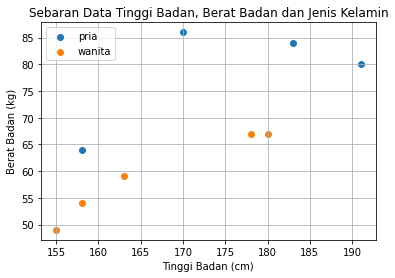

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for kelamin, d in pengukuran_df.groupby('kelamin'):
  ax.scatter(d['tinggi'], d['berat'], label=kelamin)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show

#**3. PREPROCESSING DATA**

In [ ]:
import numpy as np

x_train = np.array(pengukuran_df[['tinggi', 'berat']])
y_train = np.array(pengukuran_df ['kelamin'])
print(f'x_train: \n{x_train}\n')
print(f'y_train: {y_train}')

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train: \n{y_train}')
print(f'y_train: {y_train}')


x_train: 
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']
y_train: 
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]
y_train: [[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


#**4. TRAINING MODEL**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

#**5. PREDIKSI JENIS KELAMIN**

In [ ]:
tinggi_badan = 155
berat_badan = 70
x_new = np.array([tinggi_badan, berat_badan]).reshape(1,-1)
x_new

y_new = model.predict(x_new)
y_new

lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

#**6. EVALUASI HASIL PREDIKSI**

**6.1 VISUALSIASI HASIL PREDIKSI DENGAN KNN**

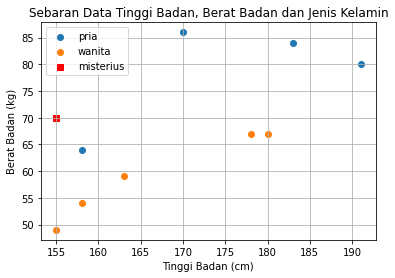

In [ ]:
fig, ax = plt.subplots()
for kelamin, d in pengukuran_df.groupby('kelamin'):
  ax.scatter(d['tinggi'], d['berat'], label=kelamin)

plt.scatter(tinggi_badan,
            berat_badan,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

6.2 PERHITUNGAN JARAK DATA BARU DENGAN DATA-DATA LAMA

In [ ]:
misterius = np.array([tinggi_badan, berat_badan])
x_train
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in x_train]
data_jarak

pengukuran_df['jarak'] = data_jarak
pengukuran_df.sort_values(['jarak'])

,tinggi,berat,kelamin,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


#**7. EVALUASI MODEL KNN UNTUK PERMASALAHAN KLASIFIKASI**

**7.1 TESTING DATA**

In [ ]:
x_test = np.array([[168,55], [180,96], [168,52], [169,67]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print(f'x_test: \n{x_test}\n')
print(f'y_test: \n{y_test}')

x_test: 
[[168  55]
 [180  96]
 [168  52]
 [169  67]]

y_test: 
[0 0 1 1]


**7.2 PREDIKSI ATAS TESTING DATA**

In [ ]:
y_prediksi = model.predict(x_test)
y_prediksi

array([1, 0, 1, 1])

**7.3 METRIK EVALUASI**

7.3.1 Akurasi (Accuracy)

In [ ]:
from sklearn.metrics import accuracy_score

akurasi = accuracy_score(y_test, y_prediksi)
print(f'accuracy: {akurasi}')

accuracy: 0.75


7.3.2 Presisi(Precision)

In [ ]:
from sklearn.metrics import precision_score

presisi = precision_score(y_test, y_prediksi)
print(f'precision: {presisi}')

precision: 0.6666666666666666


7.3.3 Recall

In [ ]:
from sklearn.metrics import recall_score

rec = recall_score (y_test, y_prediksi)
print(f'recall: {rec}')

recall: 1.0


7.3.4 F1 Score

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_prediksi)
print(f'f1 score: {f1}')


f1 score: 0.8


7.3.5 Classification Report

In [ ]:
from sklearn.metrics import classification_report
cls_report = classification_report(y_test, y_prediksi)
print(f'classification_report: \n{cls_report}')

classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



7.3.6 Confusion Matrix

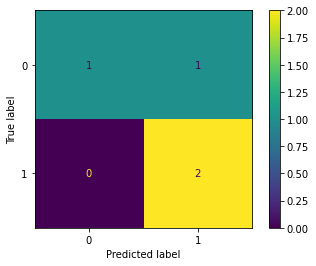

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#confusion_matrix?

y_test
y_prediksi

cm=confusion_matrix(y_test, y_prediksi)
cm

#ConfusionMatrixDisplay?

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()